# Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [41]:
#Loading the dataset
data = pd.read_excel(r'C:\Users\Rizky_Ade\Documents\File Kuliah\Project\Customer Segmentation Clustering\marketing_campaign.xlsx')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Exploratory Data Analysis

In [42]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Membuat data umur

In [43]:
from datetime import date
from datetime import datetime
data['Age'] = (2021 - data['Year_Birth'])
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
days_in_year = 365.2425
date_now = datetime.strptime('Jan 1 2021', '%b %d %Y')
data['Years_customer'] = (pd.Timestamp('now').year) - (pd.to_datetime(data['Dt_Customer']).dt.year)

Menjumlah total expenses dan total accepted campaign untuk setiap customer

In [44]:
data['Total_Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Total_Acc_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Mengecek apakah ada Null values

In [46]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Years_customer          0
Total_Expenses          0
Total_Acc_Cmp           0
dtype: int64

In [47]:
data['ID'].nunique()

2240

# Data Visualization

Text(0.5, 1.0, 'Age')

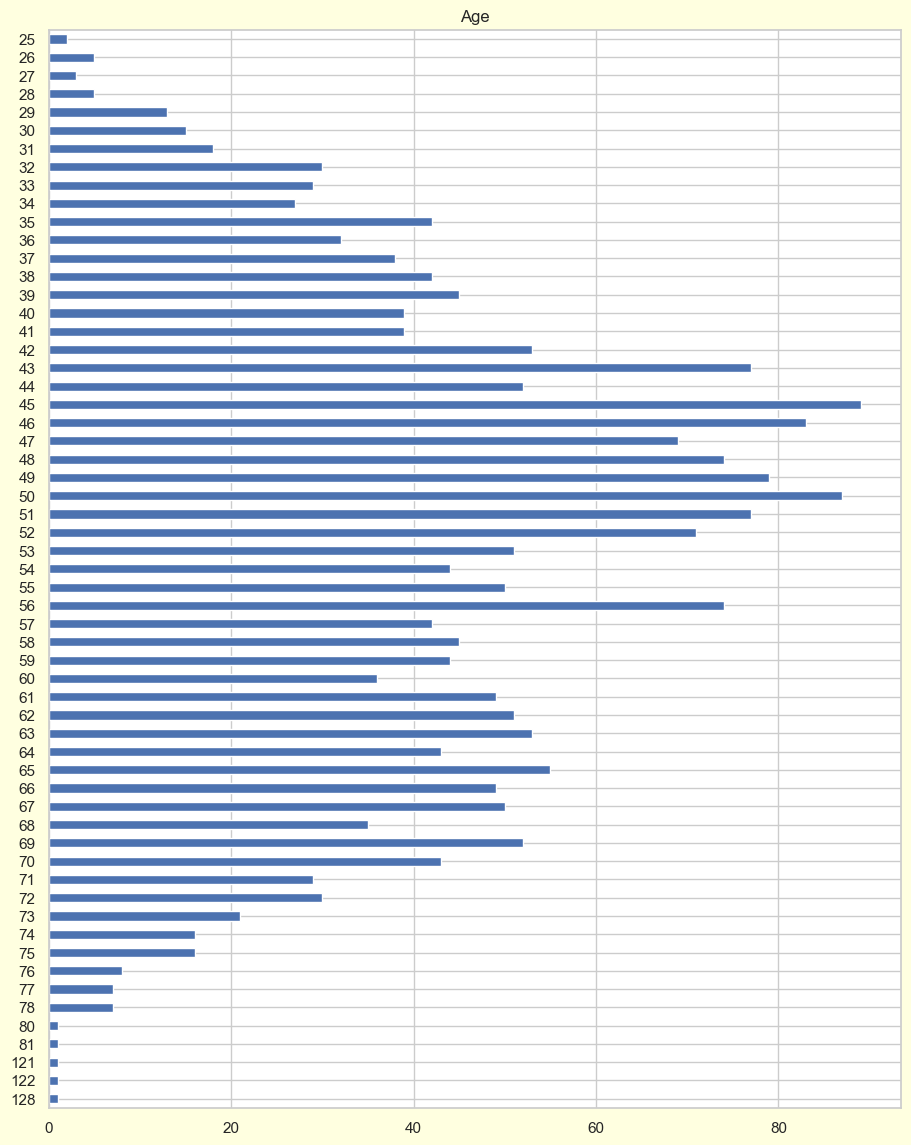

In [48]:
plt.figure(figsize=(11,14), facecolor='lightyellow')
data['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Age')

Text(0.5, 1.0, 'Income')

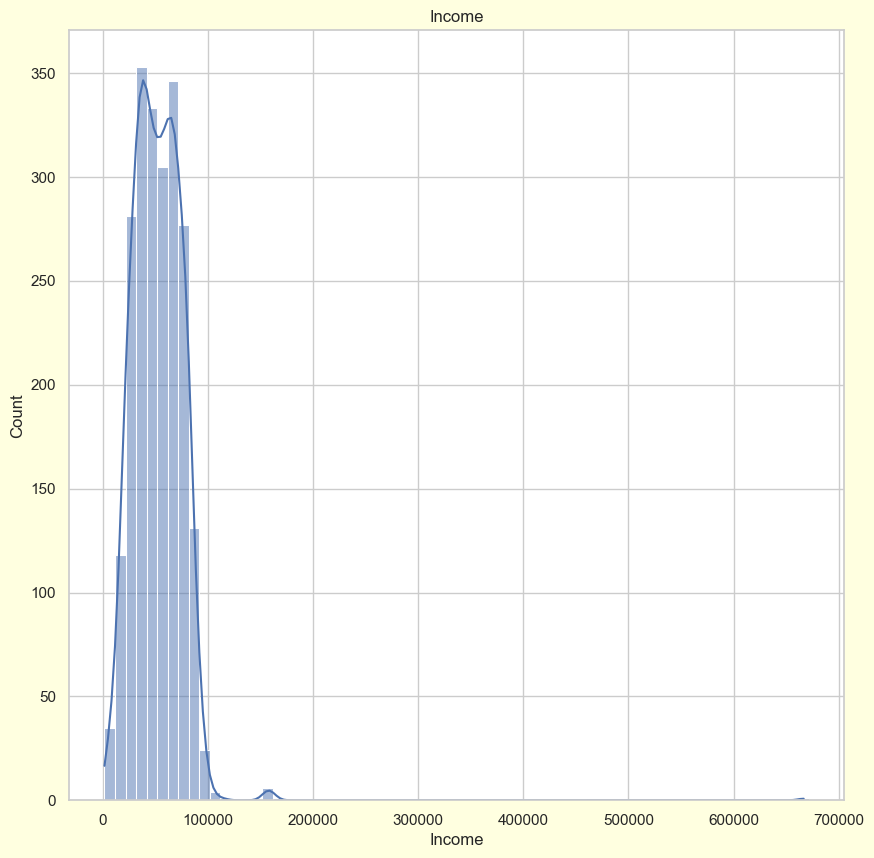

In [49]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.histplot(data=data, x='Income', binwidth=10000, kde=True)
ax.set_title('Income')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

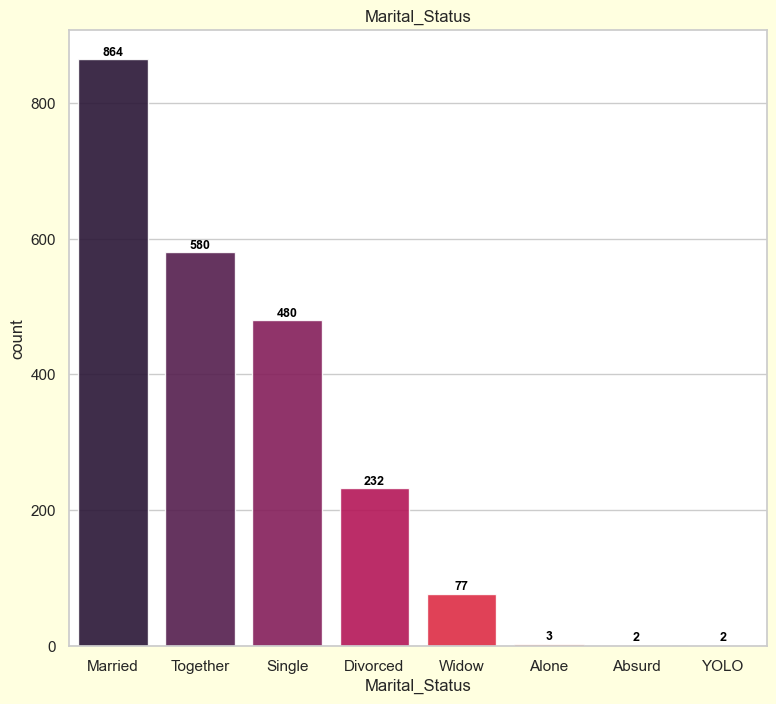

In [51]:
# Membuat count plot
plt.figure(figsize=(9, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Marital_Status', saturation=1, alpha=0.9, palette='rocket', order=data['Marital_Status'].value_counts().index)
ax.set_title('Marital_Status')

for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points', color='black', fontweight='semibold', fontsize=9)

plt.show()

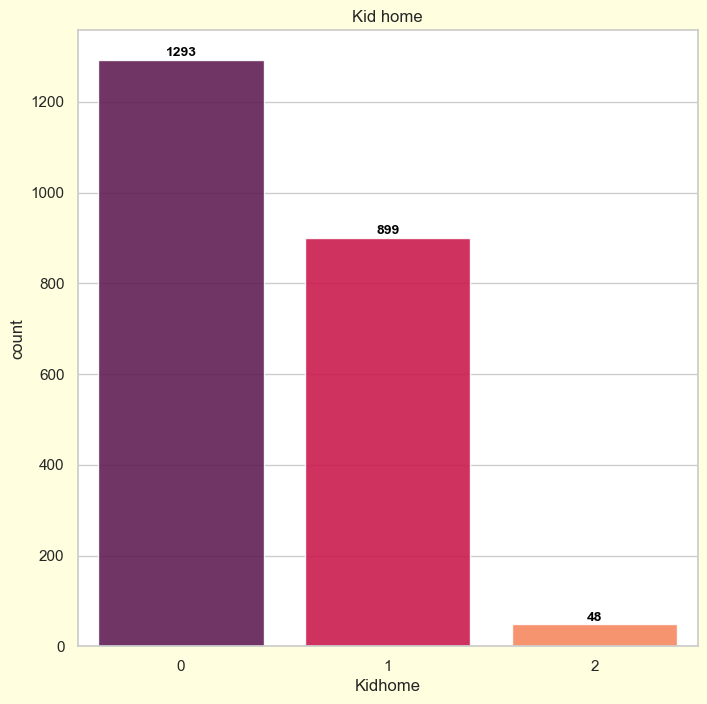

In [52]:
plt.figure(figsize=(8, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Kidhome', saturation=1, alpha=0.9, palette='rocket', order=data['Kidhome'].value_counts().index)
ax.set_title('Kid home')

for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
        xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=10)

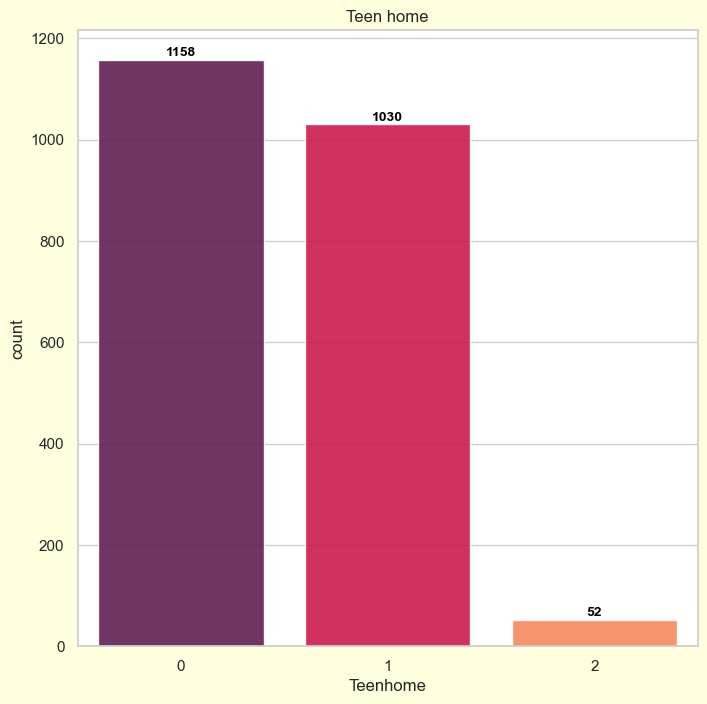

In [53]:
plt.figure(figsize=(8, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Teenhome', saturation=1, alpha=0.9, palette='rocket', order=data['Teenhome'].value_counts().index)
ax.set_title('Teen home')

for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
        xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=10)

Text(-49, 0, '680816')

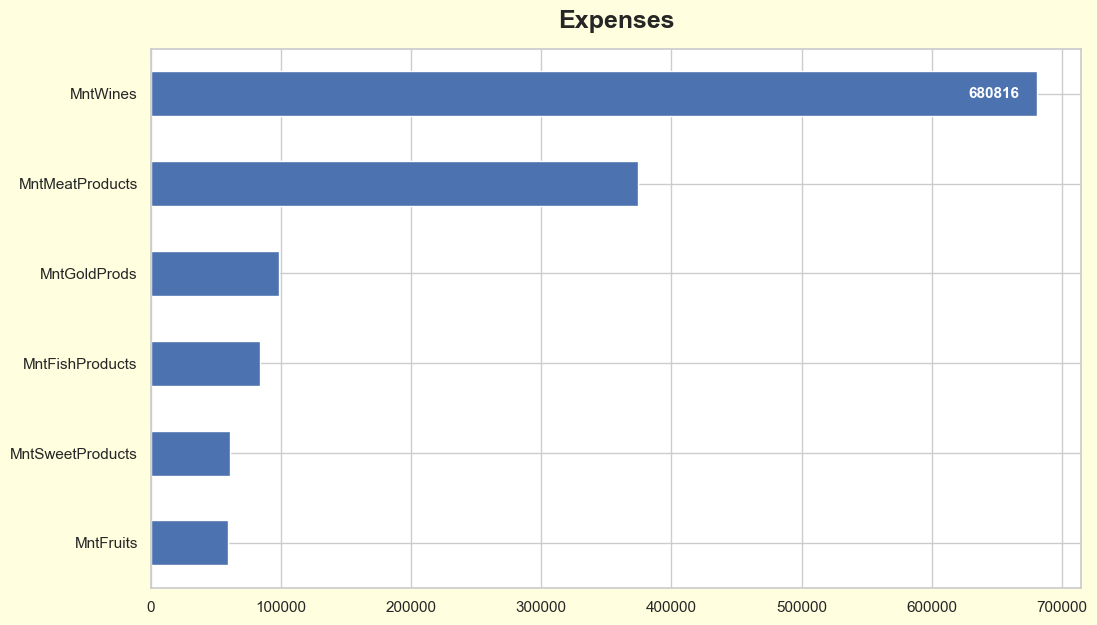

In [55]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

Text(-50, 0, '334')

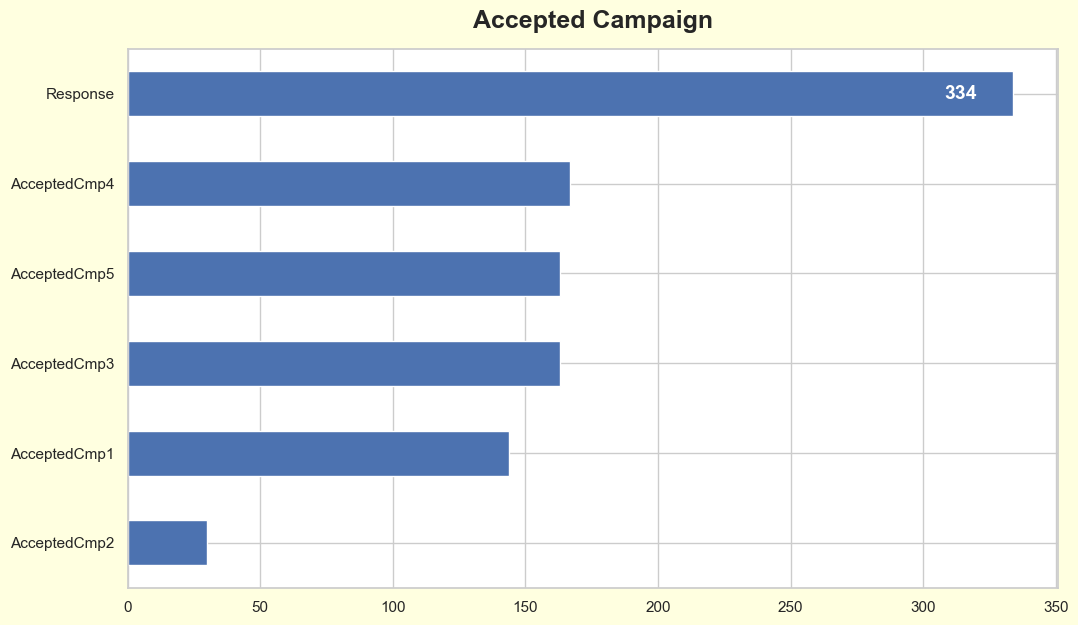

In [56]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Accepted Campaign', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-50, 0),
textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')

Text(-50, 0, '12970')

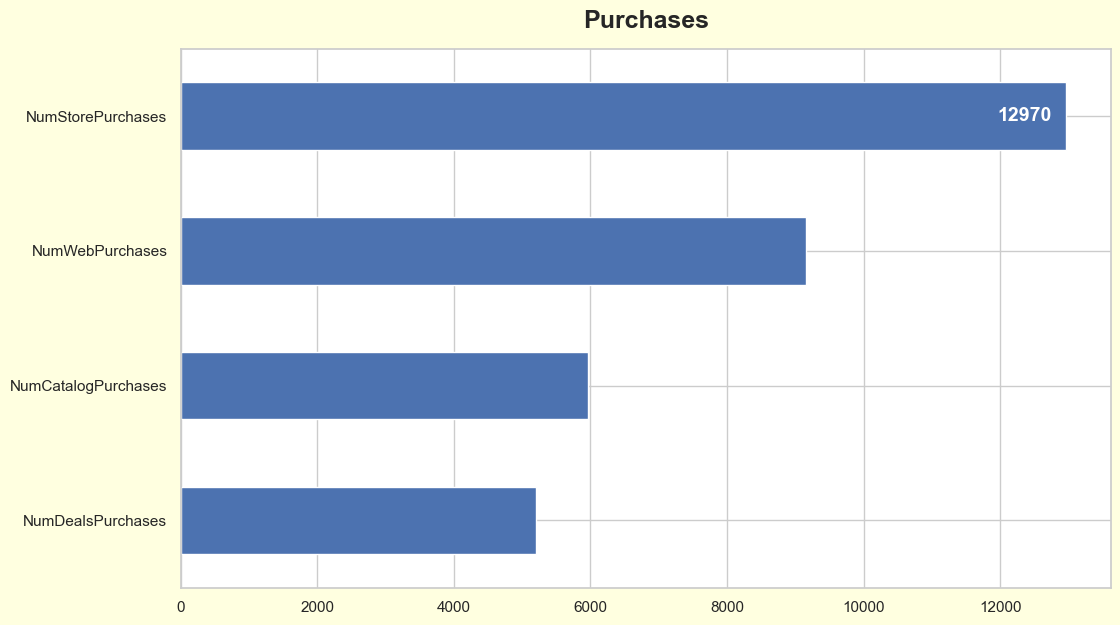

In [57]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Purchases', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-50, 0),
textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')

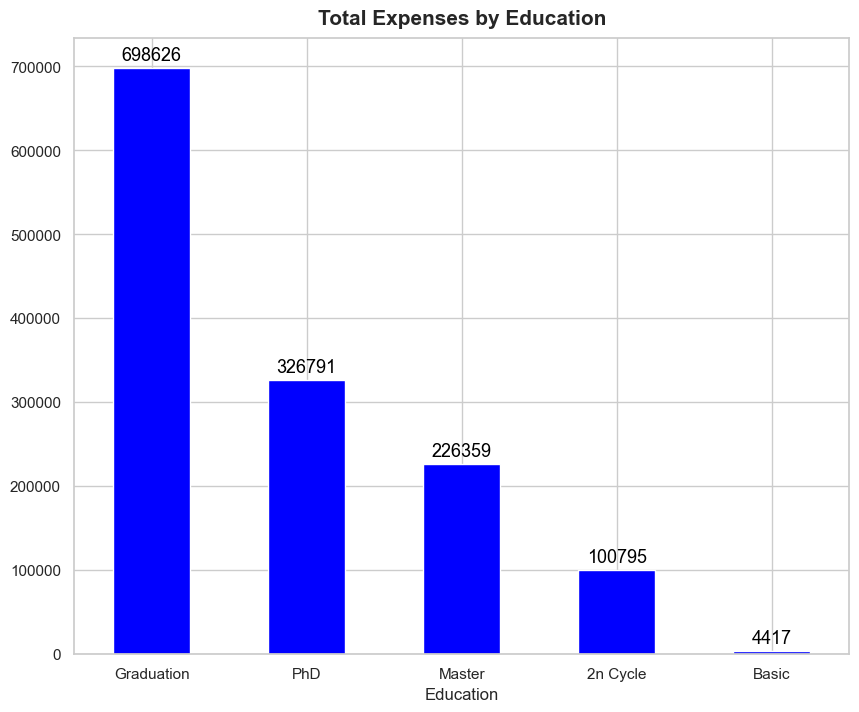

In [58]:
sns.set(style='whitegrid')
ax = data[['Education','Total_Expenses']].groupby('Education').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', figsize=(10,8), legend=None, color='blue')
plt.xticks(rotation=360)
plt.title('Total Expenses by Education', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

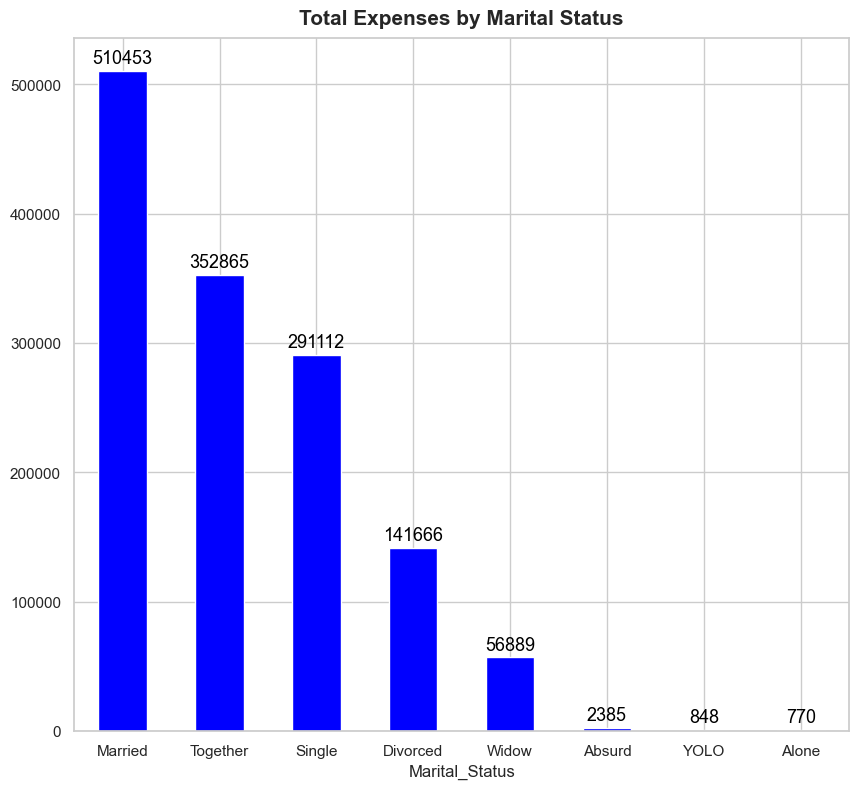

In [59]:
sns.set(style='whitegrid')
ax = data[['Marital_Status','Total_Expenses']].groupby('Marital_Status').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', color='blue', figsize=(10,9), legend=None)
plt.xticks(rotation=360)
plt.title('Total Expenses by Marital Status', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

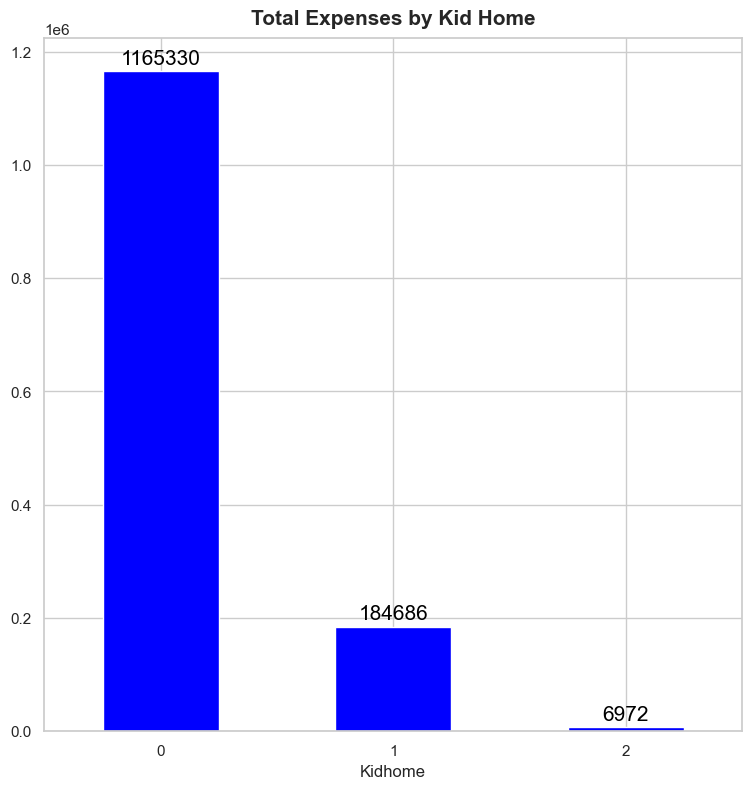

In [60]:
sns.set(style='whitegrid')
ax = data[['Kidhome','Total_Expenses']].groupby('Kidhome').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', color='blue', figsize=(9,9), legend=None)
plt.xticks(rotation=360)
plt.title('Total Expenses by Kid Home', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,9), textcoords='offset points', color='black', fontsize=15)

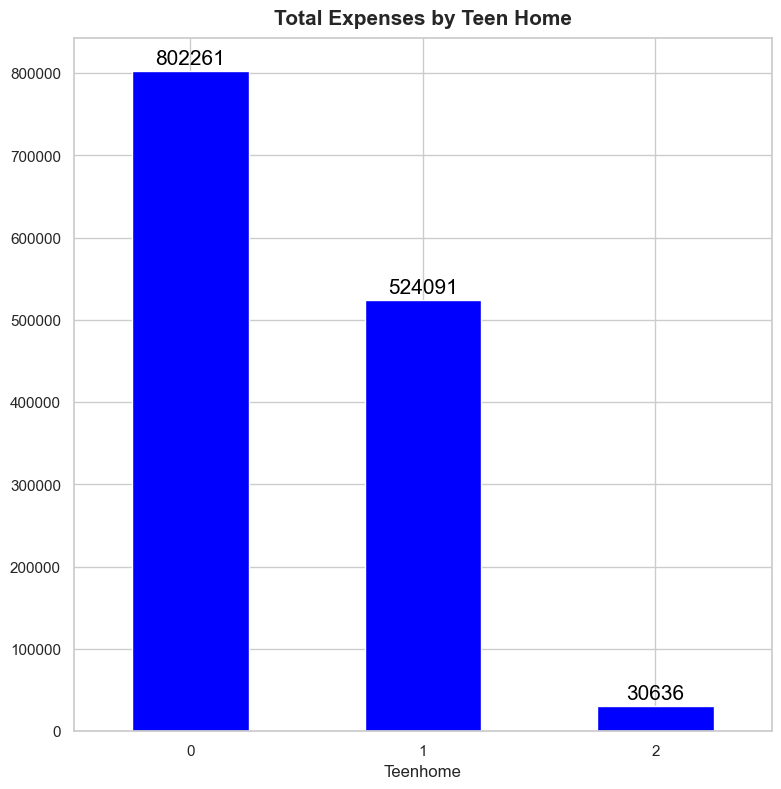

In [61]:
sns.set(style='whitegrid')
ax = data[['Teenhome','Total_Expenses']].groupby('Teenhome').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', color='blue', figsize=(9,9), legend=None)
plt.xticks(rotation=360)
plt.title('Total Expenses by Teen Home', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,9), textcoords='offset points', color='black', fontsize=15)

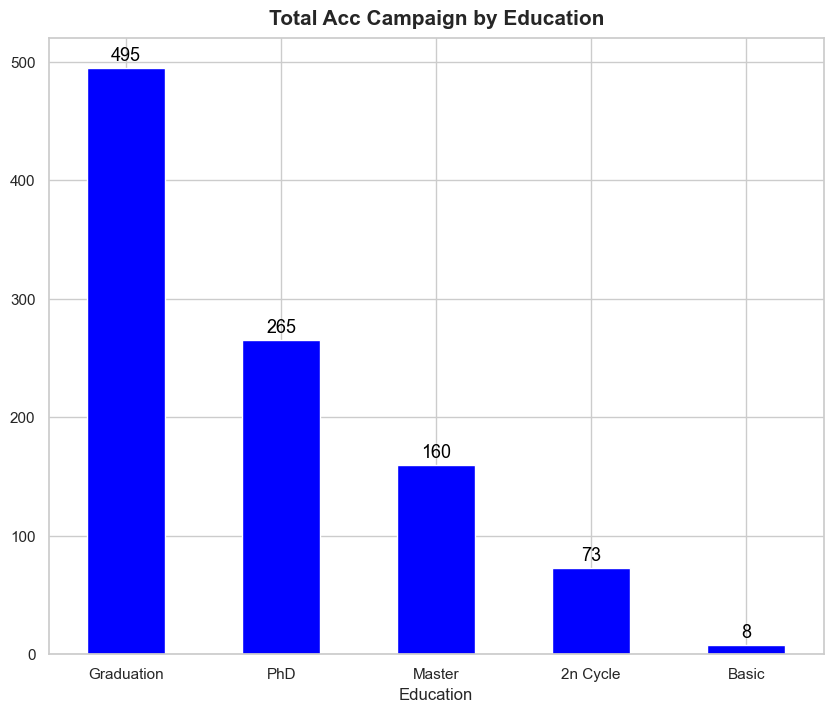

In [62]:
sns.set(style='whitegrid')
ax = data[['Education','Total_Acc_Cmp']].groupby('Education').sum().sort_values(by='Total_Acc_Cmp', ascending=False).plot(kind='bar', figsize=(10,8), legend=None, color='blue')
plt.xticks(rotation=360)
plt.title('Total Acc Campaign by Education', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

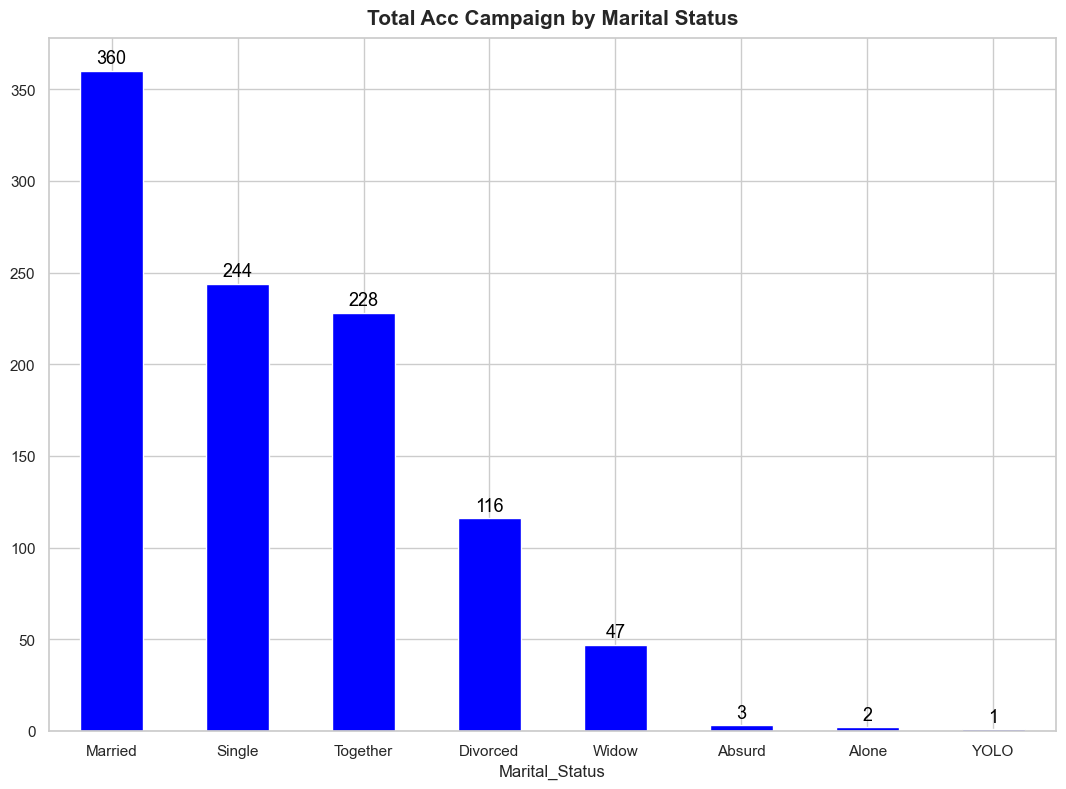

In [63]:
sns.set(style='whitegrid')
ax = data[['Marital_Status','Total_Acc_Cmp']].groupby('Marital_Status').sum().sort_values(by='Total_Acc_Cmp', ascending=False).plot(kind='bar', figsize=(13,9), legend=None, color='blue')
plt.xticks(rotation=360)
plt.title('Total Acc Campaign by Marital Status', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

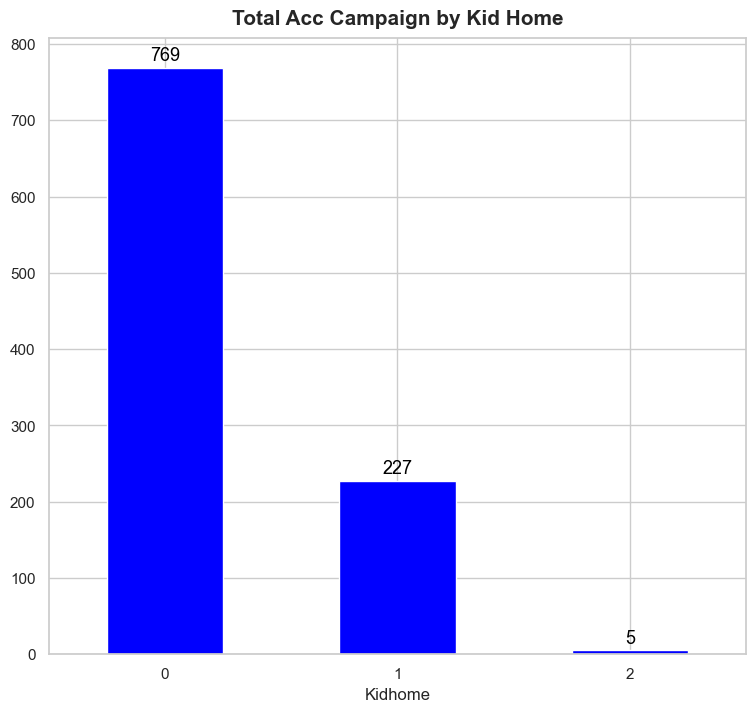

In [64]:
sns.set(style='whitegrid')
ax = data[['Kidhome','Total_Acc_Cmp']].groupby('Kidhome').sum().sort_values(by='Total_Acc_Cmp', ascending=False).plot(kind='bar', figsize=(9,8), legend=None, color='blue')
plt.xticks(rotation=360)
plt.title('Total Acc Campaign by Kid Home', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

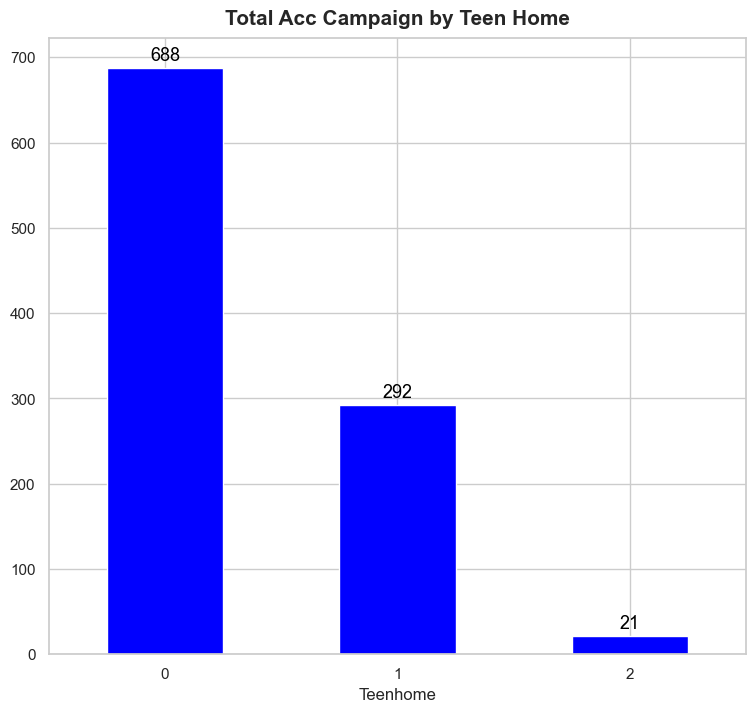

In [65]:
sns.set(style='whitegrid')
ax = data[['Teenhome','Total_Acc_Cmp']].groupby('Teenhome').sum().sort_values(by='Total_Acc_Cmp', ascending=False).plot(kind='bar', figsize=(9,8), legend=None, color='blue')
plt.xticks(rotation=360)
plt.title('Total Acc Campaign by Teen Home', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

<Axes: >

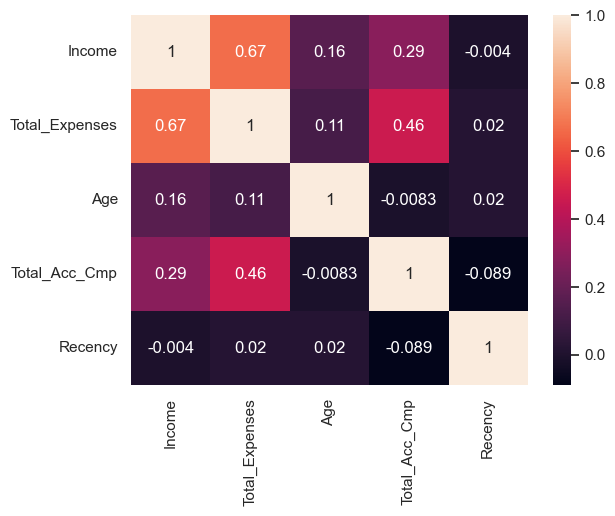

In [66]:
sns.heatmap(data[['Income', 'Total_Expenses','Age', 'Total_Acc_Cmp', 'Recency']].corr(), annot=True)

# Data Preprocessing

###### Handling missing value

In [67]:
data['Income'].fillna(data['Income'].mean(), inplace=True)

In [68]:
data_prep = data.copy()

Label Encoding untuk marital status

In [69]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
lenc.fit(data_prep['Marital_Status'])
data_prep['Marital_Status'] = lenc.transform(data_prep['Marital_Status'])

Ordinal Encoding untuk education

In [70]:
from sklearn.preprocessing import OrdinalEncoder
edu = ['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD']
ore = OrdinalEncoder(categories=([edu]))
ore.fit(data_prep[['Education']])
data_prep['Education'] = ore.transform(data_prep[['Education']])

Droping feature yang tidak dibutuhkan

In [71]:
data_prep = data_prep.drop(['ID', 'Year_Birth', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response', 'Complain', 'Z_CostContact', 'Z_Revenue'], axis=1)
data_proc = data_prep.copy()

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_scaler = np.array(data_proc[['Income','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Years_customer', 'Total_Expenses', 'Total_Acc_Cmp']]).reshape(-1,19)
scaler.fit(std_scaler)
data_proc[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Years_customer', 'Total_Expenses', 'Total_Acc_Cmp']] = scaler.transform(std_scaler)

print("Data setelah disesuaikan:\n", data_proc)


Data setelah disesuaikan:
       Education  Marital_Status    Income   Kidhome  Teenhome   Recency  \
0           1.0               4  0.235327 -0.825218 -0.929894  0.307039   
1           1.0               4 -0.235826  1.032559  0.906934 -0.383664   
2           1.0               5  0.773633 -0.825218 -0.929894 -0.798086   
3           1.0               5 -1.022732  1.032559 -0.929894 -0.798086   
4           4.0               3  0.241519  1.032559 -0.929894  1.550305   
...         ...             ...       ...       ...       ...       ...   
2235        1.0               3  0.358568 -0.825218  0.906934 -0.107383   
2236        4.0               5  0.470064  2.890335  0.906934  0.237969   
2237        1.0               2  0.189106 -0.825218 -0.929894  1.446700   
2238        2.0               5  0.679035 -0.825218  0.906934 -1.419719   
2239        4.0               3  0.024838  1.032559  0.906934 -0.314594   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0   

# Clustering

### K-Means

C:\Users\Rizky_Ade\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rizky_Ade\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rizky_Ade\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rizky_Ade\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

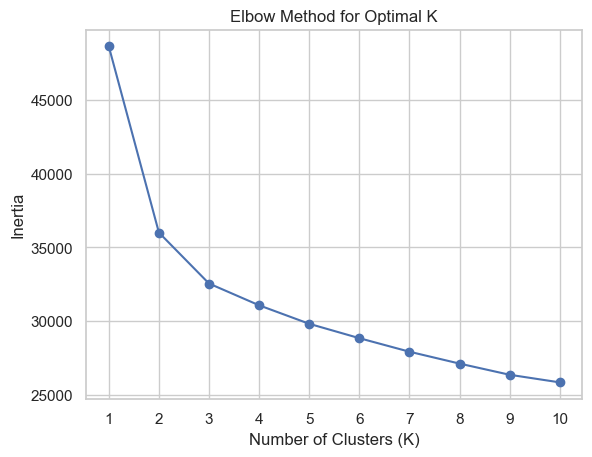

In [83]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menghitung nilai inertia untuk jumlah cluster 1 hingga 10
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_proc)  # Menggunakan DataFrame data_proc
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.show()


In [84]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_proc)
label = kmeans.predict(data_proc)
data_segment = data_prep.copy()
data_segment['Segments'] = label

C:\Users\Rizky_Ade\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [85]:
data_segment.groupby(['Segments']).mean()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Total_Expenses,Total_Acc_Cmp
Segments,,,,,,,,,,,,,,,,,,,,,
0,2.025584,3.740823,71960.342615,0.071190,0.432703,49.720801,609.016685,55.625139,360.890990,78.901001,...,76.605117,2.024472,5.784205,5.320356,8.558398,3.727475,53.994438,10.045606,1238.446051,0.808676
1,1.938106,3.722595,39031.689054,0.694258,0.555556,48.699478,99.410887,6.644295,36.932886,9.787472,...,22.178225,2.526473,2.945563,0.879940,3.934377,6.381805,50.987323,9.922446,181.674124,0.204325


In [86]:
data_segment['Labels'] = data_segment['Segments'].map({1:'well-off',
0:'fewer-opportunities'})

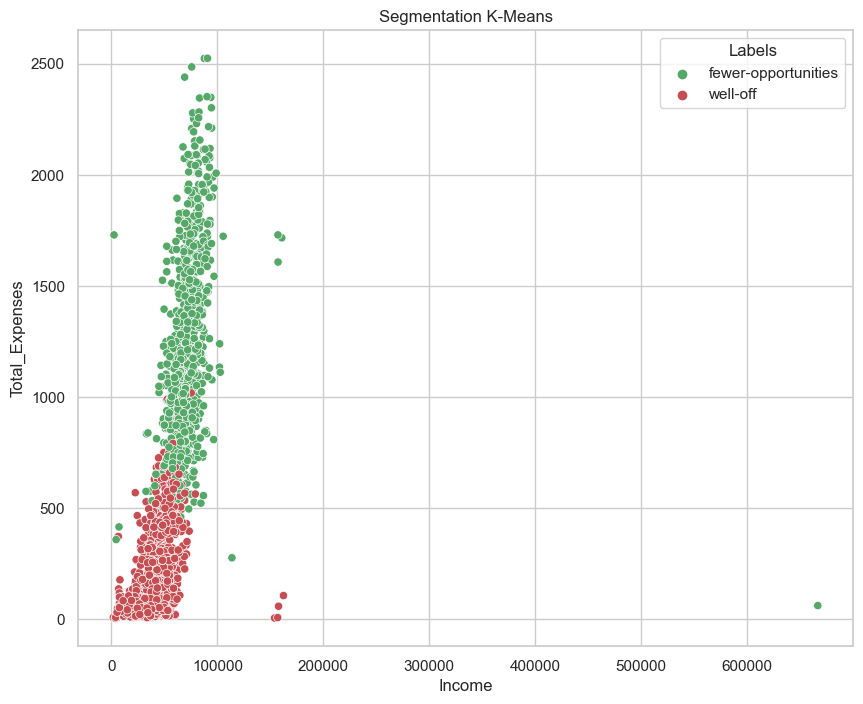

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume data_segment is your DataFrame containing 'Income', 'Total_Expenses', and 'Labels'

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='Total_Expenses', data=data_segment, hue='Labels', palette=['g', 'r'])
plt.title('Segmentation K-Means')
plt.show()


### Agglomerative

In [90]:
from sklearn.cluster import AgglomerativeClustering
agl =  AgglomerativeClustering(n_clusters=2)
agl.fit(data_proc)
label = agl.labels_
data_segment_3 = data_prep.copy()
data_segment_3['cluster'] = label
data_segment_3.groupby(['cluster']).mean()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Total_Expenses,Total_Acc_Cmp
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.992602,3.733662,43410.164935,0.588779,0.625771,48.784217,196.124538,10.342787,64.133785,14.970407,...,31.919852,2.643650,3.645499,1.469790,4.807645,6.197904,52.092478,9.964858,328.368064,0.256473
1,1.922330,3.720065,75441.028330,0.064725,0.192557,49.962783,586.896440,68.189320,436.800971,96.723301,...,75.784790,1.488673,5.237864,5.791262,8.368932,3.003236,52.461165,9.990291,1333.940129,0.946602


In [95]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for i in range(2, 10):
    agl = AgglomerativeClustering(n_clusters=i)
    agl.fit(data_proc)
    label = agl.labels_
    score = silhouette_score(data_proc, label)
    print("Untuk k =", i, ", silhouette score =", score)


Untuk k = 2 , silhouette score = 0.25833563130995013
Untuk k = 3 , silhouette score = 0.16472260367988747
Untuk k = 4 , silhouette score = 0.15281018836769622
Untuk k = 5 , silhouette score = 0.07359997142084543
Untuk k = 6 , silhouette score = 0.07596714651732925
Untuk k = 7 , silhouette score = 0.0674938591777174
Untuk k = 8 , silhouette score = 0.06762238571827839
Untuk k = 9 , silhouette score = 0.06900890767676411


Medium Link: https://medium.com/@andhikaw.789/customer-personality-analysis-segmentation-clustering-1b68a62a61a2

In [97]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Contoh data dalam bentuk DataFrame
data = pd.DataFrame({
    'Usia': [25, 30, 35, 40, 45],
    'Pendapatan': [50000, 60000, 70000, 80000, 90000],
    'Pengeluaran': [2000, 2500, 3000, 3500, 4000]
})

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Menghitung rata-rata dan deviasi standar untuk digunakan nanti
scaler.fit(data)

# Transformasi data menggunakan StandardScaler
data_scaled = scaler.transform(data)

# Menampilkan data sebelum dan setelah diskalakan
print("Data Awal:\n", data)
print("\nData Setelah Diskalakan (dengan rata-rata dan deviasi standar):")
print(pd.DataFrame(data_scaled, columns=data.columns))


Data Awal:
    Usia  Pendapatan  Pengeluaran
0    25       50000         2000
1    30       60000         2500
2    35       70000         3000
3    40       80000         3500
4    45       90000         4000

Data Setelah Diskalakan (dengan rata-rata dan deviasi standar):
       Usia  Pendapatan  Pengeluaran
0 -1.414214   -1.414214    -1.414214
1 -0.707107   -0.707107    -0.707107
2  0.000000    0.000000     0.000000
3  0.707107    0.707107     0.707107
4  1.414214    1.414214     1.414214
